In [1]:
# 그래프에서 한글 출력 설정
#1. 한글 설정 코드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,573 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123633 files and dire

In [1]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') # 폰트 설정
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
%config InlineBackend.figure_format='retina' # 그래프 글씨 뚜렷

import missingno as msno # 경고 메세지 무시
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore',category=FutureWarning)


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
'/content/drive/MyDrive/24_소모임/beyond_1/'

'/content/drive/MyDrive/24_소모임/beyond_1/'

In [17]:
path = '/content/drive/MyDrive/24_소모임/beyond_1/'
df = pd.read_csv( path + '출생아수_실업률_소비자물가지수.csv')
df.head()
df.shape

(4425, 6)

In [18]:
df.head()

,시군구별,연도,월,출생아수,실업률,소비자물가지수
0,서울특별시,1999,6,9642.0,7.1,59.841
1,부산광역시,1999,6,3085.0,10.5,61.110
2,대구광역시,1999,6,2387.0,8.4,61.903
3,인천광역시,1999,6,2608.0,9.4,61.483
4,광주광역시,1999,6,1474.0,8.7,62.439


## 로그변환 결측 생성


In [19]:
# 결측치 처리 (예: 평균 대체)
df['출생아수'] = df['출생아수'].fillna(df['출생아수'].mean())
df['실업률'] = df['실업률'].fillna(df['실업률'].mean())
df['소비자물가지수'] = df['소비자물가지수'].fillna(df['소비자물가지수'].mean())

In [20]:
df['출생아수_변환'] = np.log1p(df['출생아수'])  # 로그 변환
df['실업률_변환'] = np.log1p(df['실업률'])  # 로그 변환
df['소비자물가지수_변환'] = np.log1p(df['소비자물가지수'])  # 로그 변환

In [21]:
df['날짜'] = pd.to_datetime(
    df['연도'].astype(str) + '-' + df['월'].astype(str) + '-01')

In [38]:
df

,시군구별,연도,월,출생아수,실업률,소비자물가지수,출생아수_변환,실업률_변환,소비자물가지수_변환,날짜
0,서울특별시,1999,6,9642.0,7.1,59.841,9.173988,2.091864,4.108264,1999-06-01
1,부산광역시,1999,6,3085.0,10.5,61.110,8.034631,2.442347,4.128907,1999-06-01
2,대구광역시,1999,6,2387.0,8.4,61.903,7.778211,2.240710,4.141594,1999-06-01
3,인천광역시,1999,6,2608.0,9.4,61.483,7.866722,2.341806,4.134895,1999-06-01
4,광주광역시,1999,6,1474.0,8.7,62.439,7.296413,2.272126,4.150079,1999-06-01
...,...,...,...,...,...,...,...,...,...,...
4420,충청북도,2023,12,515.0,2.4,113.340,6.246107,1.223775,4.739176,2023-12-01
4421,충청남도,2023,12,703.0,3.1,113.260,6.556778,1.410987,4.738477,2023-12-01
4422,전라남도,2023,12,533.0,3.1,113.380,6.280396,1.410987,4.739526,2023-12-01
4423,경상북도,2023,12,742.0,4.3,113.500,6.610696,1.667707,4.740575,2023-12-01


#선형회귀

In [25]:
# 필요한 열만 선택
selected_columns =df[['날짜', '출생아수_변환', '실업률_변환']]

# 결측치 확인
missing_values = selected_columns.isnull().sum()
print("결측치 확인:")
print(missing_values)
# 결측치 처리 (예: 평균 대체)
selected_columns['출생아수_변환'] = selected_columns['출생아수_변환'].fillna(selected_columns['출생아수_변환'].mean())
selected_columns['실업률_변환'] = selected_columns['실업률_변환'].fillna(selected_columns['실업률_변환'].mean())

결측치 확인:
날짜         0
출생아수_변환    0
실업률_변환     0
dtype: int64


In [23]:
# 필요한 열만 선택
selected_columns =df[['날짜', '출생아수' , '실업률']]

# 결측치 확인
missing_values = selected_columns.isnull().sum()
print("결측치 확인:")
print(missing_values)
# 결측치 처리 (예: 평균 대체)
selected_columns['출생아수_변환'] = selected_columns['출생아수'].fillna(selected_columns['출생아수'].mean())
selected_columns['실업률_변환'] = selected_columns['실업률'].fillna(selected_columns['실업률'].mean())

결측치 확인:
날짜      0
출생아수    0
실업률     0
dtype: int64


In [26]:
selected_columns

,날짜,출생아수_변환,실업률_변환
0,1999-06-01,9.173988,2.091864
1,1999-06-01,8.034631,2.442347
2,1999-06-01,7.778211,2.240710
3,1999-06-01,7.866722,2.341806
4,1999-06-01,7.296413,2.272126
...,...,...,...
4420,2023-12-01,6.246107,1.223775
4421,2023-12-01,6.556778,1.410987
4422,2023-12-01,6.280396,1.410987
4423,2023-12-01,6.610696,1.667707


In [27]:
# '날짜'를 인덱스로 설정
time_series_data = selected_columns.set_index('날짜')
# 성별이나 지역별로 나눠져 있으면 그룹화
monthly_data = time_series_data.groupby('날짜')[['출생아수_변환', '실업률_변환']].mean()


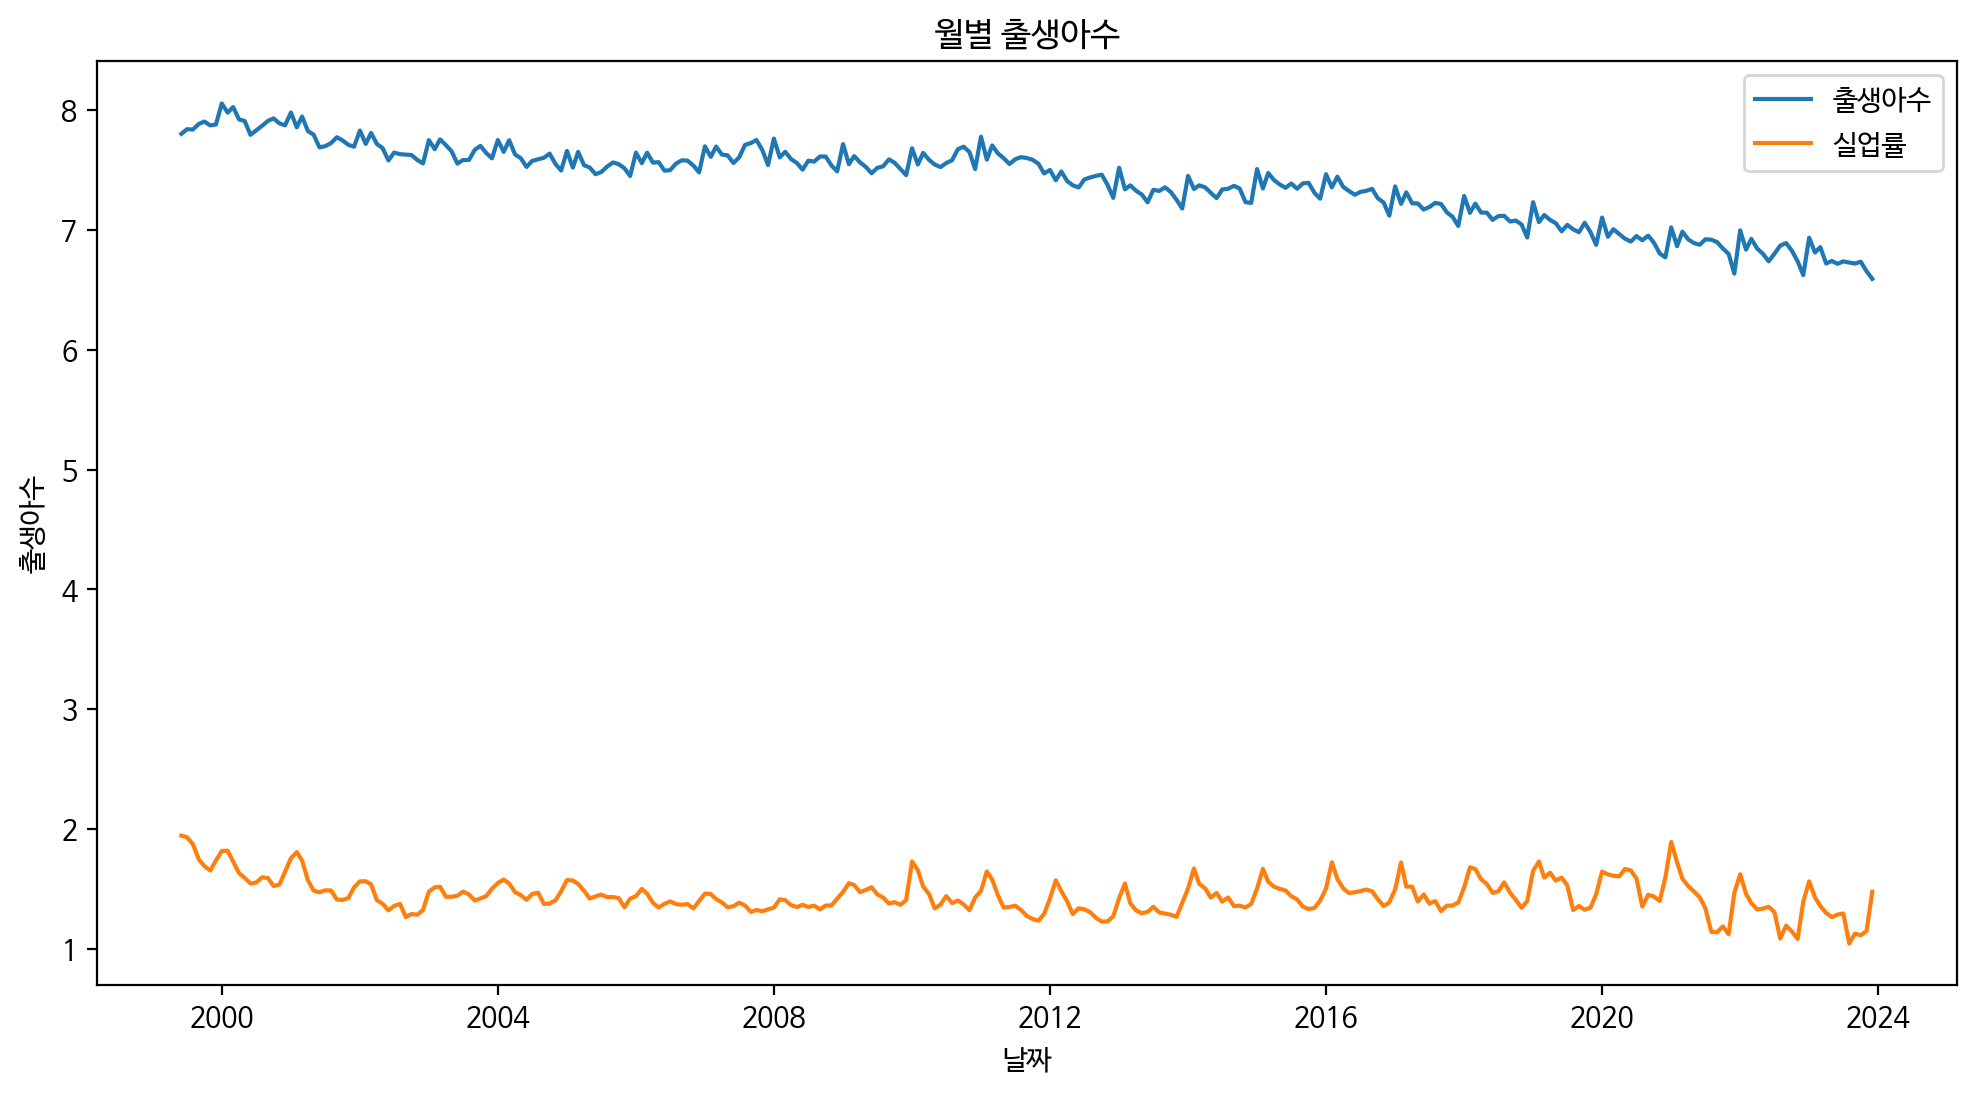

In [43]:
#출생아수와 실업률을 비교하는 그래프
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['출생아수_변환'], label='출생아수')
plt.plot(monthly_data.index, monthly_data['실업률_변환'], label='실업률')
plt.title('월별 출생아수')
plt.xlabel('날짜')
plt.ylabel('출생아수')
plt.legend()
plt.show()

In [44]:
correlation = monthly_data['실업률_변환'].corr(monthly_data['출생아수_변환'])
print(f"상관계수: {correlation}")


상관계수: 0.3140934040599618


In [45]:
# 입력 변수 (X)와 출력 변수 (y) 분리
X = monthly_data[['실업률_변환']]  # 실업률을 독립 변수로 사용
y = monthly_data[['출생아수_변환']]  # 출생아수를 종속 변수로 사용

In [46]:
from sklearn.model_selection import train_test_split

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
from sklearn.linear_model import LinearRegression

# 모델 초기화 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

모델 성능 평가

- 예측이 얼마나 정확한지를 판단하려면 평가 지표(예: Mean Squared Error )
- 실제 값과 예측 값 간의 평균 제곱 오차로, 값이 작을수록 모델이 정확히 예측하고 있음
-

In [48]:
from sklearn.metrics import mean_squared_error

# MSE 계산 : 실제 값과 예측 값 간 평균 제곱 오차가 0.0785
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.07850524137081481


In [49]:

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
#평균적으로 예측 값이 실제 값과 약 0.28 단위만큼 차이가 난다는 것을 의미

Root Mean Squared Error: 0.28018786799362816


In [50]:
# 로그 변환 복원
y_pred_original = np.expm1(y_pred)
y_test_original = np.expm1(y_test)

# 복원 후 MSE 계산
original_mse = mean_squared_error(y_test_original, y_pred_original)
original_rmse = np.sqrt(original_mse)

print(f"Original MSE: {original_mse}")
print(f"Original RMSE: {original_rmse}")


Original MSE: 211401.66967298804
Original RMSE: 459.78437301955796


In [55]:
# 새로운 실업률 데이터로 예측
future_unemployment_rate = [[5]] # 예: 5% 실업률
future_births = model.predict(future_unemployment_rate)
print(f"예측된 출생아수: {future_births[0]}")

예측된 출생아수: [9.97565401]


In [56]:
# 예측된 로그 값
#변형된 실제 값은 추정된 비율의 예측 값을 원래의 데이터 비율로 복원한 값
predicted_log_value =[9]

# 실제 값으로 변환
actual_value = np.expm1(predicted_log_value)  # np.exp(predicted_log_value) - 1
print(f"실제 값: {actual_value}")



실제 값: [8102.08392758]


In [37]:
df.tail()

,시군구별,연도,월,출생아수,실업률,소비자물가지수,출생아수_변환,실업률_변환,소비자물가지수_변환,날짜
4420,충청북도,2023,12,515.0,2.4,113.34,6.246107,1.223775,4.739176,2023-12-01
4421,충청남도,2023,12,703.0,3.1,113.26,6.556778,1.410987,4.738477,2023-12-01
4422,전라남도,2023,12,533.0,3.1,113.38,6.280396,1.410987,4.739526,2023-12-01
4423,경상북도,2023,12,742.0,4.3,113.50,6.610696,1.667707,4.740575,2023-12-01
4424,경상남도,2023,12,903.0,3.3,112.94,6.806829,1.458615,4.735672,2023-12-01


#다항회귀

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [58]:
# 필요한 열만 선택
processed_data = df[['날짜','출생아수_변환',  '실업률_변환', '소비자물가지수_변환']].dropna()

In [59]:
# 독립 변수(X)와 종속 변수(y) 분리
X = processed_data[['실업률_변환', '소비자물가지수_변환']]
y = processed_data['출생아수_변환']

In [60]:
# 2. 다항 회귀를 위한 특징 변환
# 2차 다항식 특징 생성
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [61]:
# 3. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)


In [62]:
# 데이터 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
# 4. 다항 회귀 모델 학습
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [64]:
# 5. 모델 평가
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


In [65]:
# 출력
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error (MSE): 0.55
Root Mean Squared Error (RMSE): 0.74


In [ ]:
# 출력
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error (MSE): 0.54
Root Mean Squared Error (RMSE): 0.73


In [67]:
# 6. 예측 결과 일부 확인
results = pd.DataFrame({
    'Actual': np.expm1(y_test),
    'Predicted': np.expm1(y_pred)
}).head(10)
results


,Actual,Predicted
1257,1350.000000,1346.482593
2572,115.000000,1844.019373
3741,592.000000,1552.562993
1068,1819.000000,2558.258520
1732,2330.654656,1844.019373
287,2849.000000,2987.031852
4139,1144.000000,1150.242642
1844,2529.000000,1836.324414
3928,1126.000000,1527.132380
1056,875.000000,2284.760980


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [75]:
# 필요한 열만 선택
processed_data = df[['날짜', '출생아수_변환',  '실업률_변환',
       '소비자물가지수_변환']].dropna()

In [76]:
# 독립 변수(X)와 종속 변수(y) 분리
X = processed_data[['실업률_변환', '소비자물가지수_변환']]
y = processed_data['출생아수_변환']

In [77]:
# 2. 다항 회귀를 위한 특징 변환
# 2차 다항식 특징 생성
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)


In [78]:
# 3. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)


In [79]:
# 데이터 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [80]:
# 4. 다항 회귀 모델 학습
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [83]:
# 5. 모델 평가
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [82]:
# 출력
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error (MSE): 0.55
Root Mean Squared Error (RMSE): 0.74


MSE = 0.54, RMSE = 0.73은 다항 회귀 모델이 로그 변환된 데이터에서 높은 정확도를 보여줬음을 의미

In [87]:
# 6. 예측 결과 일부 확인
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
}).head(10)
results

,Actual,Predicted
1257,7.208600,7.205993
2572,4.753590,7.520245
3741,6.385194,7.348306
1068,7.506592,7.847473
1732,7.754333,7.520245
287,7.955074,8.002370
4139,7.043160,7.048597
1844,7.835975,7.516066
3928,7.027315,7.331802
1056,6.775366,7.734454


In [88]:
# 지수 변환하여 실제 값으로 복원
results['Actual'] = np.expm1(results['Actual'])  # e^(x) - 1
results['Predicted'] = np.expm1(results['Predicted'])  # e^(x) - 1
results['차이'] = results['Actual'] - results['Predicted']
results

,Actual,Predicted,차이
1257,1350.000000,1346.482593,3.517407
2572,115.000000,1844.019373,-1729.019373
3741,592.000000,1552.562993,-960.562993
1068,1819.000000,2558.258520,-739.258520
1732,2330.654656,1844.019373,486.635284
287,2849.000000,2987.031852,-138.031852
4139,1144.000000,1150.242642,-6.242642
1844,2529.000000,1836.324414,692.675586
3928,1126.000000,1527.132380,-401.132380
1056,875.000000,2284.760980,-1409.760980


-대부분의 경우에서 예측 값이 실제 값보다 매우 낮거나 매우 다르게 나타났습니다.
- 이는 모델이 출생아수를 잘 예측하지 못하고 있음을 시사합니다.

- 로그 변환의 정보 손실:

로그 변환은 큰 값을 축소하여 모델이 학습하기 쉽게 만듭니다.
하지만 원래 값이 큰 경우, 복원 후 예측 값이 실제 값보다 지나치게 작아지는 현상이 발생할 수 있습니다

-  출생아수의 분포  데이터 문제

출생아수가 특정 구간에 집중되거나, 매우 큰 값(예: 8825)과 작은 값(예: 279)이 혼재되어 있다면 모델이 이를 적절히 학습하지 못했을 가능성이 있습니다.
- 독립 변수의 제한:

실업률과 소비자물가지수는 출생아수에 영향을 미치는 여러 요인 중 일부일 뿐입니다.
- 평가 기준의 문제

MSE와 RMSE는 전체적으로 모델이 데이터를 얼마나 잘 설명하는지를 나타내지만, 개별 데이터 포인트에 대한 정확도를 반영하지 못합니다.
이로 인해 특정 값에서의 큰 오차가 모델 성능 평가에 충분히 드러나지 않을 수 있습니다.

#랜덤 포레스트(Random Forest)

In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. 데이터 준비
# 독립 변수(X)와 종속 변수(y) 정의
X = df[['실업률', '소비자물가지수']]
y = np.log1p(df['출생아수'])  # 로그 변환된 출생아수

In [90]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [91]:
# 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [110]:
# 2. 랜덤 포레스트 모델 학습
# 모델 생성
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 학습
rf_model.fit(X_train_scaled, y_train)



RandomForestRegressor(random_state=42)

In [93]:
# 3. 예측 수행
y_pred_log = rf_model.predict(X_test)  # 로그 변환된 예측 값
y_pred_actual = np.expm1(y_pred_log)  # 원래 값으로 복원

In [94]:
# 4. 평가
y_test_actual = np.expm1(y_test)  # 테스트 데이터의 실제 값을 원래 값으로 복원
mse = mean_squared_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mse)

In [95]:
# 출력
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error (MSE): 8887347.04
Root Mean Squared Error (RMSE): 2981.17


In [96]:
# 5. 일부 결과 확인
results = pd.DataFrame({
    'Actual': y_test_actual,
    'Predicted': y_pred_actual
}).head(10)
results

,Actual,Predicted
1257,1350.000000,522.719642
2572,115.000000,540.112679
3741,592.000000,540.620583
1068,1819.000000,540.620583
1732,2330.654656,540.112679
287,2849.000000,540.620583
4139,1144.000000,540.112679
1844,2529.000000,540.112679
3928,1126.000000,540.620583
1056,875.000000,540.112679


In [111]:
#results['Actual'] = np.expm1(results['Actual'])  # e^(x) - 1
#results['Predicted'] = np.expm1(results['Predicted'])  # e^(x) - 1
results['차이'] = results['Actual'] - results['Predicted']
results


,Actual,Predicted,차이
1257,1350.000000,522.719642,827.280358
2572,115.000000,540.112679,-425.112679
3741,592.000000,540.620583,51.379417
1068,1819.000000,540.620583,1278.379417
1732,2330.654656,540.112679,1790.541977
287,2849.000000,540.620583,2308.379417
4139,1144.000000,540.112679,603.887321
1844,2529.000000,540.112679,1988.887321
3928,1126.000000,540.620583,585.379417
1056,875.000000,540.112679,334.887321


In [115]:
#새로운 데이터 입력: 예를 들어, 실업률이 0.5이고 소비자물가지수가 평균값인 경우를 예측합니다.
# 새로운 데이터 입력
new_data = pd.DataFrame({
    '실업률': [2.4],
    '소비자물가지수': [113.34]
})

# 데이터 전처리
new_data_scaled = scaler.transform(new_data)

# 예측 수행
predicted_log = rf_model.predict(new_data_scaled)

# 로그 변환 복원
predicted_births = np.expm1(predicted_log)

print(f"예측된 출생아수: {predicted_births[0]:.2f}")


예측된 출생아수: 612.07


In [114]:
df.tail()

,시군구별,연도,월,출생아수,실업률,소비자물가지수,출생아수_변환,실업률_변환,소비자물가지수_변환,날짜
4420,충청북도,2023,12,515.0,2.4,113.34,6.246107,1.223775,4.739176,2023-12-01
4421,충청남도,2023,12,703.0,3.1,113.26,6.556778,1.410987,4.738477,2023-12-01
4422,전라남도,2023,12,533.0,3.1,113.38,6.280396,1.410987,4.739526,2023-12-01
4423,경상북도,2023,12,742.0,4.3,113.50,6.610696,1.667707,4.740575,2023-12-01
4424,경상남도,2023,12,903.0,3.3,112.94,6.806829,1.458615,4.735672,2023-12-01


#하이퍼튜닝

랜덤 포레스트 모델의 하이퍼파라미터 튜닝과 교차 검증을 통해 데이터 예측 성능을 높이는 방법을 설명하고, 구현 가능한 코드

1. 하이퍼파라미터 튜닝
랜덤 포레스트의 주요 하이퍼파라미터

- n_estimators: 트리의 개수.
- max_depth: 트리의 최대 깊이.
- min_samples_split: 노드를 분할하기 위한 최소 샘플 수.
- min_samples_leaf: 리프 노드에 있어야 하는 최소 샘플 수.
- max_features: 각 노드에서 고려할 최대 특징 수.


튜닝 방법은 Grid Search나 Randomized Search를 사용합니다.

In [116]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error



In [117]:
# 하이퍼파라미터 범위 설정
param_distributions = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}


In [118]:

# 랜덤 포레스트 모델 초기화
rf_model = RandomForestRegressor(random_state=42)

# RandomizedSearchCV 설정
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions,
    n_iter=50,  # 시도할 하이퍼파라미터 조합의 개수
    cv=5,  # 5겹 교차 검증
    scoring='neg_mean_squared_error',  # 평가 기준
    random_state=42,
    n_jobs=-1  # 병렬 처리
)


In [120]:
# RandomizedSearchCV 실행
random_search.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [121]:
# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", random_search.best_params_)

최적의 하이퍼파라미터: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10}


In [122]:
# 최적의 모델
best_rf_model = random_search.best_estimator_

In [123]:
# 테스트 데이터 예측
y_pred_log = best_rf_model.predict(X_test_scaled)

In [124]:
# 로그 변환 복원
y_pred = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)

In [125]:
# 평가
mse = mean_squared_error(y_test_actual, y_pred)
rmse = np.sqrt(mse)

In [126]:

print(f"최적화된 모델의 Mean Squared Error (MSE): {mse:.2f}")
print(f"최적화된 모델의 Root Mean Squared Error (RMSE): {rmse:.2f}")

최적화된 모델의 Mean Squared Error (MSE): 4831114.60
최적화된 모델의 Root Mean Squared Error (RMSE): 2197.98


In [127]:
# 교차 검증 점수 계산
cv_scores = cross_val_score(best_rf_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

print("교차 검증 RMSE 점수:", cv_rmse_scores)
print("평균 RMSE:", cv_rmse_scores.mean())

교차 검증 RMSE 점수: [0.72152193 0.67228024 0.71250216 0.6868154  0.68229663]
평균 RMSE: 0.6950832708744913


In [133]:
# 새로운 데이터 입력
new_data = pd.DataFrame({
    '실업률': [4.1],
    '소비자물가지수': [113.38]
})

# 데이터 전처리
new_data_scaled = scaler.transform(new_data)

# 예측 수행
predicted_log = best_rf_model.predict(new_data_scaled)

# 로그 변환 복원
predicted_births = np.expm1(predicted_log)

print(f"최적화된 모델로 예측된 출생아수: {predicted_births[0]:.2f}")


최적화된 모델로 예측된 출생아수: 650.90


In [129]:
df.tail()

,시군구별,연도,월,출생아수,실업률,소비자물가지수,출생아수_변환,실업률_변환,소비자물가지수_변환,날짜
4420,충청북도,2023,12,515.0,2.4,113.34,6.246107,1.223775,4.739176,2023-12-01
4421,충청남도,2023,12,703.0,3.1,113.26,6.556778,1.410987,4.738477,2023-12-01
4422,전라남도,2023,12,533.0,3.1,113.38,6.280396,1.410987,4.739526,2023-12-01
4423,경상북도,2023,12,742.0,4.3,113.50,6.610696,1.667707,4.740575,2023-12-01
4424,경상남도,2023,12,903.0,3.3,112.94,6.806829,1.458615,4.735672,2023-12-01


# AR(자기회귀, AutoRegressive) 모형
 시계열 데이터를 과거의 값으로 돌려 표현하는 통계 모델. 데이터의 패턴을 활용하여 미래를 예측하는 데 사용

In [134]:
df.head()

,시군구별,연도,월,출생아수,실업률,소비자물가지수,출생아수_변환,실업률_변환,소비자물가지수_변환,날짜
0,서울특별시,1999,6,9642.0,7.1,59.841,9.173988,2.091864,4.108264,1999-06-01
1,부산광역시,1999,6,3085.0,10.5,61.110,8.034631,2.442347,4.128907,1999-06-01
2,대구광역시,1999,6,2387.0,8.4,61.903,7.778211,2.240710,4.141594,1999-06-01
3,인천광역시,1999,6,2608.0,9.4,61.483,7.866722,2.341806,4.134895,1999-06-01
4,광주광역시,1999,6,1474.0,8.7,62.439,7.296413,2.272126,4.150079,1999-06-01


In [153]:
# 날짜를 datetime 형식으로 변환
df['날짜'] = pd.to_datetime(df['날짜'])

# 시계열 데이터로 변환 (서울특별시의 데이터 사용 예시)
#2023년도 정보는 예측과 비교하기위해 빼고, 분석실행

#seoul_data = df[df['시군구별'] == '서울특별시'][['날짜', '출생아수']].set_index('날짜')
seoul_data = df[(df['시군구별'] == '서울특별시') & (df['연도'] != 2023)][['날짜', '출생아수']].set_index('날짜')
# 시계열 데이터 확인
print(seoul_data.head())
print(seoul_data.tail())

               출생아수
날짜                 
1999-06-01   9642.0
1999-07-01   9997.0
1999-08-01   9969.0
1999-09-01  10478.0
1999-10-01  10584.0
              출생아수
날짜                
2022-08-01  3670.0
2022-09-01  3651.0
2022-10-01  3612.0
2022-11-01  3230.0
2022-12-01  2901.0


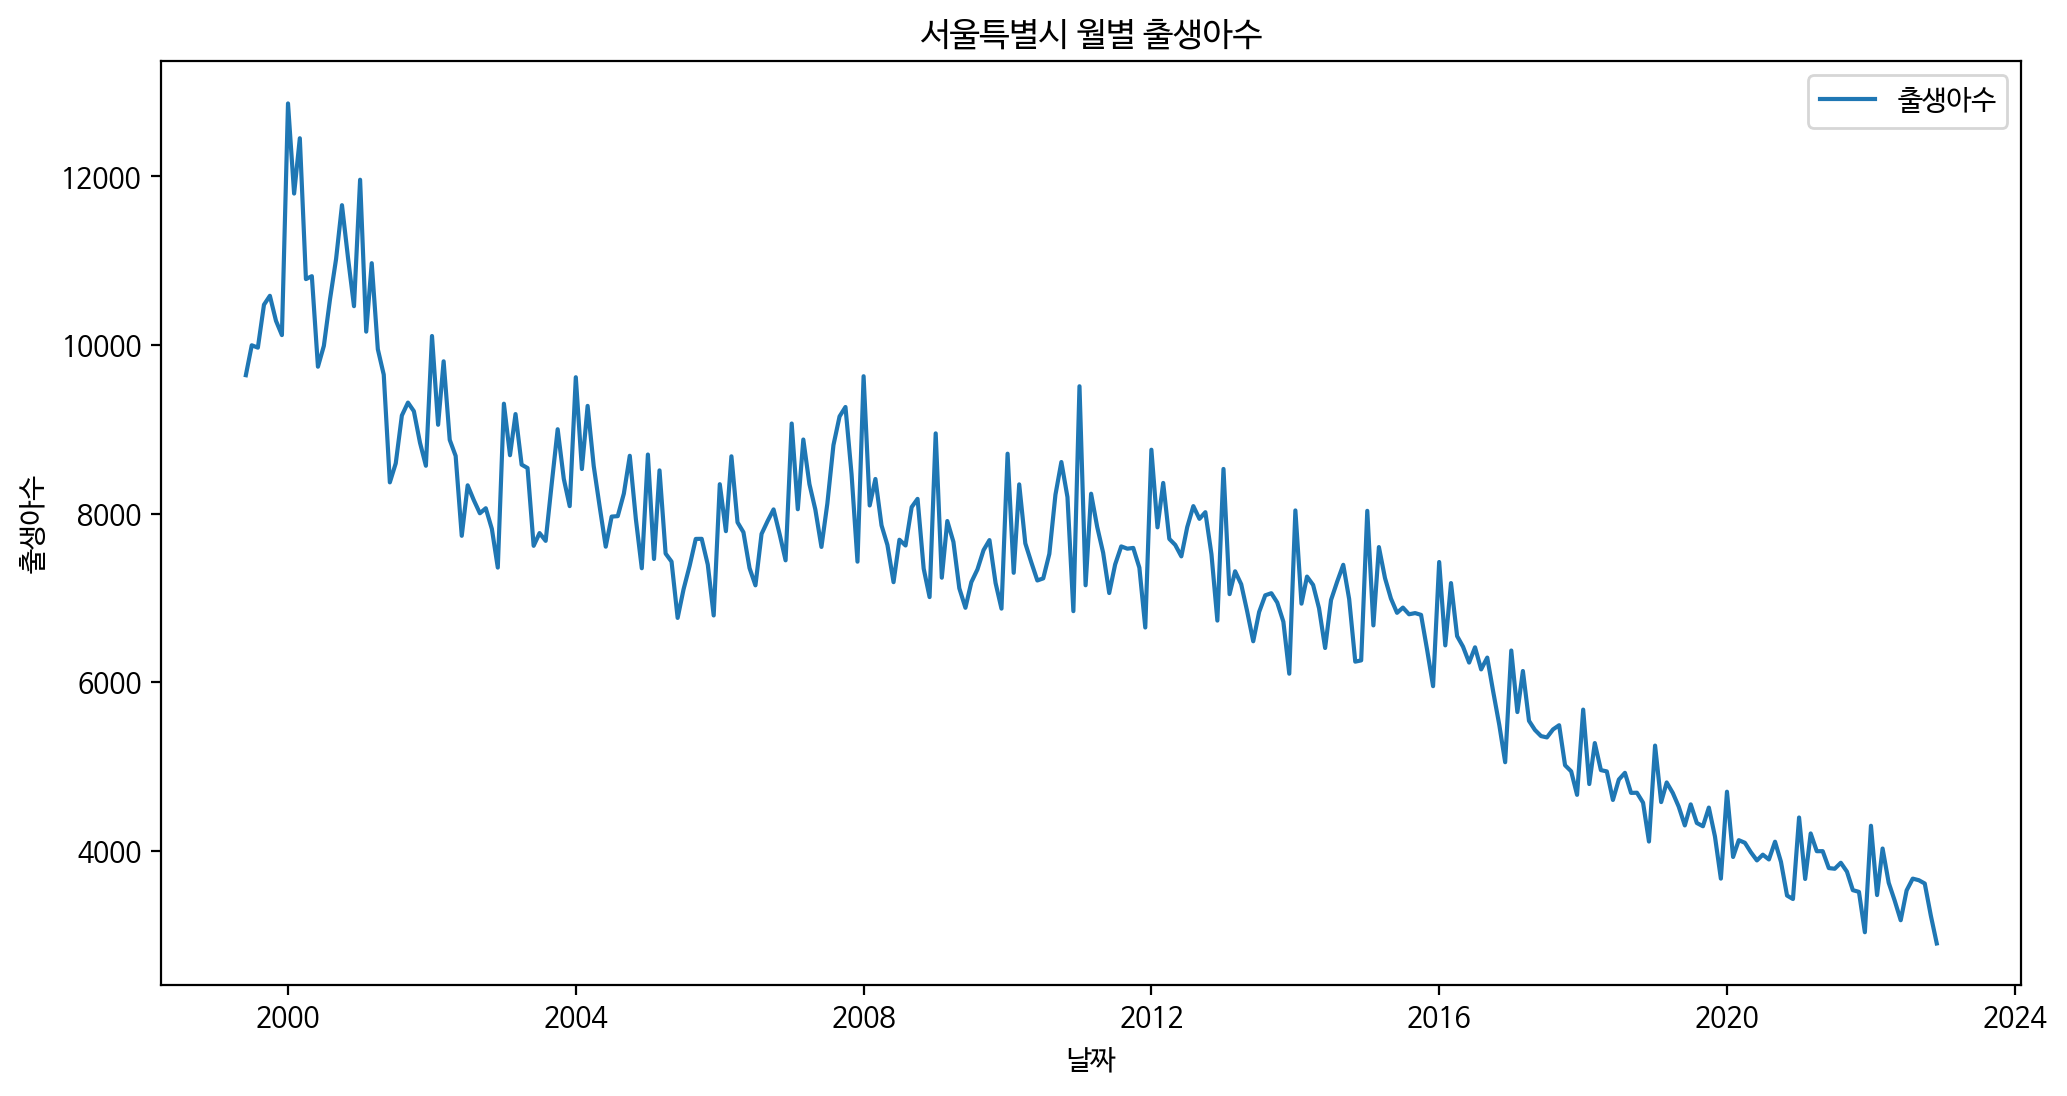

In [154]:
# 시계열 데이터 시각화
plt.figure(figsize=(12, 6))
plt.plot(seoul_data.index, seoul_data['출생아수'], label='출생아수')
plt.title('서울특별시 월별 출생아수')
plt.xlabel('날짜')
plt.ylabel('출생아수')
plt.legend()
plt.show()


In [155]:
from statsmodels.tsa.ar_model import AutoReg

# AR 모형 적합 (과거 1~3개월 데이터 활용)
model = AutoReg(seoul_data['출생아수'], lags=3)
model_fit = model.fit()

# 모델 요약
print(model_fit.summary())


                            AutoReg Model Results                             
Dep. Variable:                   출생아수   No. Observations:                  283
Model:                     AutoReg(3)   Log Likelihood               -2192.175
Method:               Conditional MLE   S.D. of innovations            608.050
Date:                Sun, 15 Dec 2024   AIC                           4394.349
Time:                        16:26:26   BIC                           4412.523
Sample:                    09-01-1999   HQIC                          4401.639
                         - 12-01-2022                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        116.0690    139.217      0.834      0.404    -156.792     388.930
출생아수.L1        0.3764      0.060      6.322      0.000       0.260       0.493
출생아수.L2        0.4993      0.056      8.878      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


- ADF 테스트와 차분

In [156]:
from statsmodels.tsa.stattools import adfuller

# ADF 테스트
result = adfuller(seoul_data['출생아수'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

# 정상성 확보를 위해 차분 수행 (필요 시)
if result[1] > 0.05:  # p-value > 0.05이면 비정상성
    seoul_data['출생아수_diff'] = seoul_data['출생아수'].diff().dropna()


ADF Statistic: -1.1050427753177077
p-value: 0.713056720535718


In [157]:
# 1차 차분
seoul_data['출생아수_diff'] = seoul_data['출생아수'].diff()

# ADF 테스트 재실행
from statsmodels.tsa.stattools import adfuller

result_diff = adfuller(seoul_data['출생아수_diff'].dropna())
print(f"ADF Statistic (1차 차분): {result_diff[0]}")
print(f"p-value (1차 차분): {result_diff[1]}")


ADF Statistic (1차 차분): -4.324093336125625
p-value (1차 차분): 0.00040341956257412245


In [158]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA 모델 적합 (p=3, d=1, q=0)
model = ARIMA(seoul_data['출생아수'], order=(3, 1, 0))
model_fit = model.fit()

# 모델 요약 출력
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                   출생아수   No. Observations:                  283
Model:                 ARIMA(3, 1, 0)   Log Likelihood               -2211.792
Date:                Sun, 15 Dec 2024   AIC                           4431.584
Time:                        16:26:50   BIC                           4446.152
Sample:                    06-01-1999   HQIC                          4437.426
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5783      0.046    -12.655      0.000      -0.668      -0.489
ar.L2         -0.1594      0.066     -2.414      0.016      -0.289      -0.030
ar.L3         -0.1027      0.060     -1.708      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [159]:
# 미래 예측 (12개월)
forecast = model_fit.forecast(steps=12)
print("미래 예측 값:")
print(forecast)



미래 예측 값:
2023-01-01    3156.150003
2023-02-01    3100.278132
2023-03-01    3125.698536
2023-04-01    3093.703955
2023-05-01    3113.890624
2023-06-01    3104.707147
2023-07-01    3110.085222
2023-08-01    3106.366224
2023-09-01    3108.602534
2023-10-01    3107.349918
2023-11-01    3108.099680
2023-12-01    3107.636150
Freq: MS, Name: predicted_mean, dtype: float64


In [163]:
df[(df['연도'] ==2023)& (df['시군구별'] == '서울특별시')]

,시군구별,연도,월,출생아수,실업률,소비자물가지수,출생아수_변환,실업률_변환,소비자물가지수_변환,날짜
4245,서울특별시,2023,1,4079.0,3.4,109.22,8.313852,1.481605,4.702478,2023-01-01
4260,서울특별시,2023,2,3317.0,2.9,109.60,8.107117,1.360977,4.705920,2023-02-01
4275,서울특별시,2023,3,3631.0,2.8,109.77,8.197539,1.335001,4.707456,2023-03-01
4290,서울특별시,2023,4,3078.0,2.8,109.94,8.032360,1.335001,4.708990,2023-04-01
4305,서울특별시,2023,5,3302.0,2.7,110.37,8.102586,1.308333,4.712858,2023-05-01
4320,서울특별시,2023,6,3133.0,2.8,110.50,8.050065,1.335001,4.714025,2023-06-01
4335,서울특별시,2023,7,3280.0,3.0,110.63,8.095904,1.386294,4.715190,2023-07-01
4350,서울특별시,2023,8,3254.0,2.0,111.69,8.087948,1.098612,4.724641,2023-08-01
4365,서울특별시,2023,9,3241.0,2.4,112.08,8.083946,1.223775,4.728096,2023-09-01
4380,서울특별시,2023,10,3344.0,2.5,112.51,8.115222,1.252763,4.731891,2023-10-01


- 성능평가:
모델의 성능을 평가하는 가장 일반적인 방법 중 하나는 잔차 분석

In [164]:
# 잔차 계산
residuals = model_fit.resid  # SARIMAX 학습된 모델의 잔차

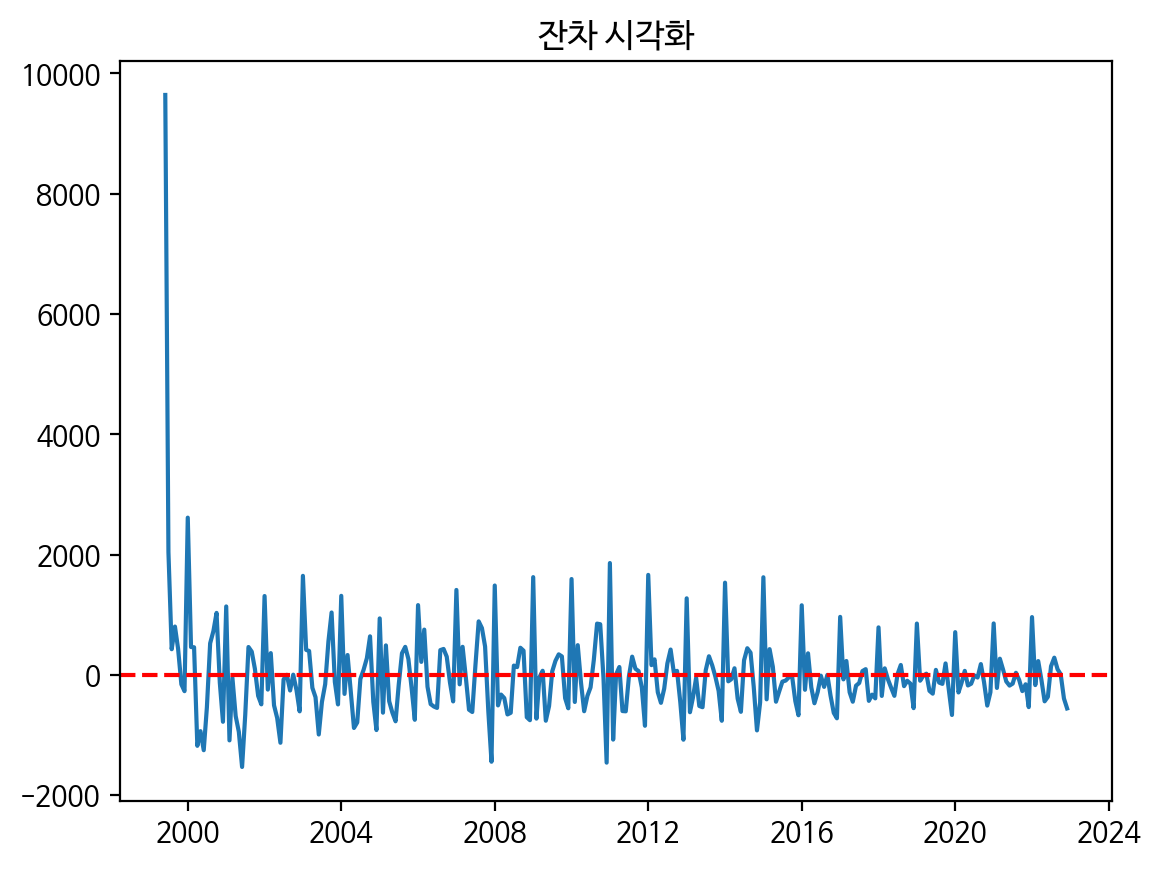

In [165]:
# 잔차 시각화
plt.plot(residuals)
plt.title("잔차 시각화")
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

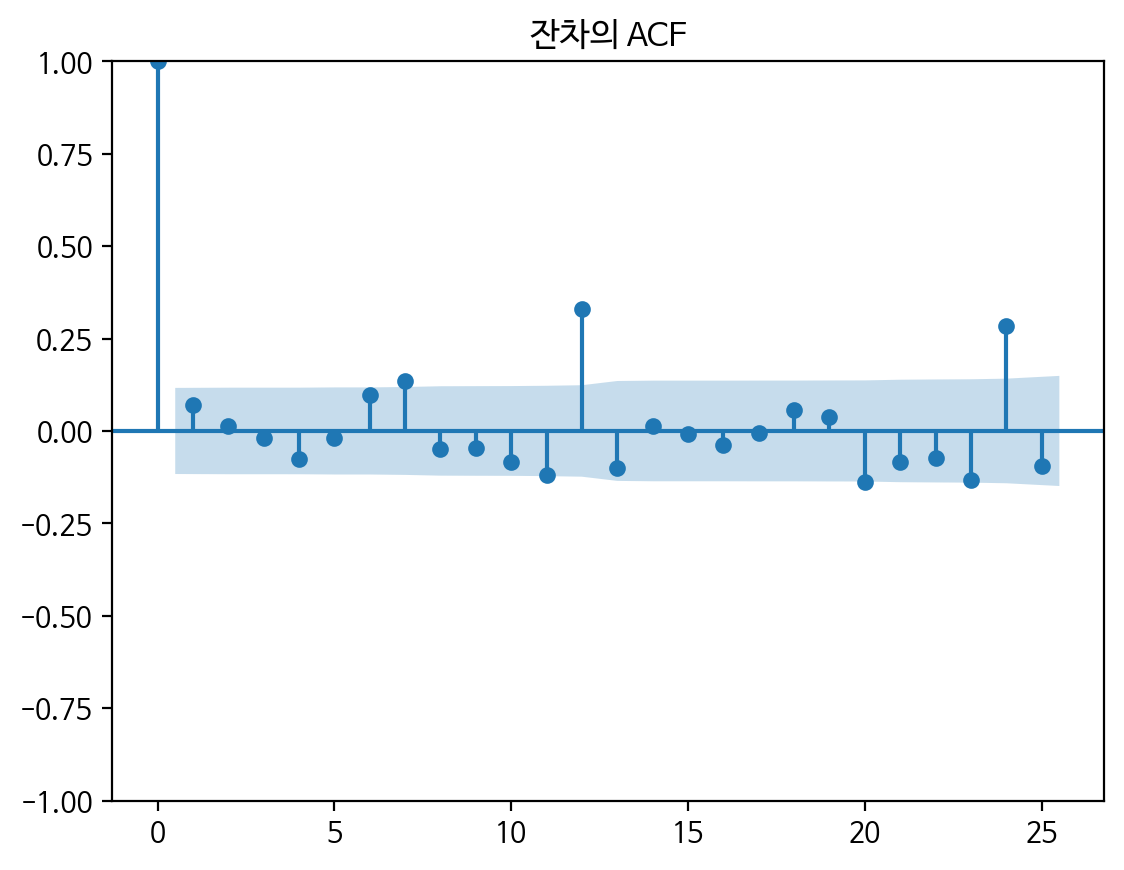

In [166]:
from statsmodels.graphics.tsaplots import plot_acf

# 잔차의 ACF
plot_acf(residuals)
plt.title("잔차의 ACF")
plt.show()


성능 평가에서 가장 일반적인 방법은 잔차 분석입니다.

위 결과에서는 **Ljung-Box 테스트에서
𝑝
>
0.05
p>0.05**이므로, 잔차에 자기상관이 없으며 모델이 데이터를 적절히 설명하고 있다고 판단할 수 있습니다.
추가적으로 잔차의 시각화와 ACF 분석을 통해, 잔차가 랜덤하게 분포하는지 확인하는 것이 유용합니다.